In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sb
from pylab import rcParams
import scipy
from scipy.stats.stats import pearsonr
from sklearn import preprocessing
from sklearn.preprocessing import scale
import nltk
from pandas import Series , DataFrame

In [2]:
adress = "/home/alek/Downloads/vaccination_tweets.csv"
df = pd.read_csv(filepath_or_buffer = adress , sep = ',', encoding='latin')
df.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,elið±ð¹ðªðºð,Your Bed,"heil, hydra ðâº",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


In [3]:
print(" \nCount total NaN at each column in a DataFrame : \n\n", 
      df.isnull().sum())

 
Count total NaN at each column in a DataFrame : 

 id                    0
user_name             0
user_location       551
user_description    131
user_created          0
user_followers        0
user_friends          0
user_favourites       0
user_verified         0
date                  0
text                  0
hashtags            673
source                1
retweets              0
favorites             0
is_retweet            0
dtype: int64


In [4]:
df["user_location"].fillna("No user_location", inplace = True)
df["user_description"].fillna("No user_description", inplace = True)
df["source"].fillna("No source", inplace = True)

In [5]:
for row in df.loc[df.hashtags.isnull(), 'hashtags'].index:
    df.at[row, 'hashtags'] = ["'no_hashtags'"]

In [6]:
df.head(30)

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,['no_hashtags'],Twitter Web App,1,1,False
2,1337858199140118533,elið±ð¹ðªðºð,Your Bed,"heil, hydra ðâº",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",['no_hashtags'],Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,No user_location,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False
5,1337852648389832708,Dee,"Birmingham, England","Gastroenterology trainee, Clinical Research Fe...",2020-01-26 21:43:12,105,108,106,False,2020-12-12 20:11:42,Does anyone have any useful advice/guidance fo...,['no_hashtags'],Twitter for iPhone,0,0,False
6,1337851215875608579,Gunther Fehlinger,"Austria, Ukraine and Kosovo",End North Stream 2 now - the pipeline of corru...,2013-06-10 17:49:22,2731,5001,69344,False,2020-12-12 20:06:00,it is a bit sad to claim the fame for success ...,['vaccination'],Twitter Web App,0,4,False
7,1337850832256176136,Dr.Krutika Kuppalli,No user_location,"ID, Global Health, VHF, Pandemic Prep, Emergin...",2019-03-25 04:14:29,21924,593,7815,True,2020-12-12 20:04:29,There have not been many bright days in 2020 b...,"['BidenHarris', 'Election2020']",Twitter for iPhone,2,22,False
8,1337850023531347969,Erin Despas,No user_location,Designing&selling on Teespring. Like 90s Disne...,2009-10-30 17:53:54,887,1515,9639,False,2020-12-12 20:01:16,Covid vaccine; You getting it?\n\n #CovidVacci...,"['CovidVaccine', 'covid19', 'PfizerBioNTech', ...",Twitter Web App,2,1,False
9,1337842295857623042,Ch.Amjad Ali,Islamabad,#ProudPakistani #LovePakArmy #PMIK @insafiansp...,2012-11-12 04:18:12,671,2368,20469,False,2020-12-12 19:30:33,#CovidVaccine \n\nStates will start getting #C...,"['CovidVaccine', 'COVID19Vaccine', 'US', 'paku...",Twitter Web App,0,0,False


In [7]:
print(" \nCount total NaN at each column in a DataFrame : \n\n", 
      df.isnull().sum())

 
Count total NaN at each column in a DataFrame : 

 id                  0
user_name           0
user_location       0
user_description    0
user_created        0
user_followers      0
user_friends        0
user_favourites     0
user_verified       0
date                0
text                0
hashtags            0
source              0
retweets            0
favorites           0
is_retweet          0
dtype: int64


In [47]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/alek/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [8]:
from nltk.tokenize import sent_tokenize
text = df['text'].to_string()
sent_tok = sent_tokenize(text)
print(sent_tok[:10])

['0       Same folks said daikon paste could treat a cyt...\n1       While the world has been on the wrong side of ...\n2       #coronavirus #SputnikV #AstraZeneca #PfizerBio...\n3       Facts are immutable, Senator, even when you\'re...\n4       Explain to me again why we need a vaccine @Bor...\n5       Does anyone have any useful advice/guidance fo...\n6       it is a bit sad to claim the fame for success ...\n7       There have not been many bright days in 2020 b...\n8       Covid vaccine; You getting it?\\n\\n #CovidVacci...\n9       #CovidVaccine \\n\\nStates will start getting #C...\n10      while deaths are closing in on the 300,000 mar...\n11      @cnnbrk #COVID19 #CovidVaccine #vaccine #Coron...\n12      The agency also released new information for h...\n13      For all the women and healthcare providers who...\n14      "Expect 145 sites across all the states to rec...\n15      Trump announces #vaccine rollout \'in less than...\n16      UPDATED: #YellowFever &amp; #COVID19 #Im

In [10]:
from nltk.tokenize import word_tokenize
text = df['text'].to_string()
word_tok = word_tokenize(text)
print(word_tok[:50])

['0', 'Same', 'folks', 'said', 'daikon', 'paste', 'could', 'treat', 'a', 'cyt', '...', '1', 'While', 'the', 'world', 'has', 'been', 'on', 'the', 'wrong', 'side', 'of', '...', '2', '#', 'coronavirus', '#', 'SputnikV', '#', 'AstraZeneca', '#', 'PfizerBio', '...', '3', 'Facts', 'are', 'immutable', ',', 'Senator', ',', 'even', 'when', 'you', "'re", '...', '4', 'Explain', 'to', 'me', 'again']


In [11]:
word_tok = [w.lower() for w in word_tok]
# remove punctuation from each word
import string
table = str.maketrans('', '', string.punctuation)
stripped = [w.translate(table) for w in word_tok]
# remove remaining tokens that are not alphabetic
words = [word for word in stripped if word.isalpha()]
# filter out stop words
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
words = [w for w in words if not w in stop_words]
print(words[:50])

['folks', 'said', 'daikon', 'paste', 'could', 'treat', 'cyt', 'world', 'wrong', 'side', 'coronavirus', 'sputnikv', 'astrazeneca', 'pfizerbio', 'facts', 'immutable', 'senator', 'even', 'explain', 'need', 'vaccine', 'bor', 'anyone', 'useful', 'adviceguidance', 'fo', 'bit', 'sad', 'claim', 'fame', 'success', 'many', 'bright', 'days', 'b', 'covid', 'vaccine', 'getting', 'nn', 'covidvacci', 'covidvaccine', 'nnstates', 'start', 'getting', 'c', 'deaths', 'closing', 'mar', 'cnnbrk', 'covidvaccine']


In [12]:
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize , word_tokenize
port_stem = PorterStemmer()

In [13]:
stemmed_words = []
for w in words:
    stemmed_words.append(port_stem.stem(w))
    
print(stemmed_words[:50])

['folk', 'said', 'daikon', 'past', 'could', 'treat', 'cyt', 'world', 'wrong', 'side', 'coronaviru', 'sputnikv', 'astrazeneca', 'pfizerbio', 'fact', 'immut', 'senat', 'even', 'explain', 'need', 'vaccin', 'bor', 'anyon', 'use', 'adviceguid', 'fo', 'bit', 'sad', 'claim', 'fame', 'success', 'mani', 'bright', 'day', 'b', 'covid', 'vaccin', 'get', 'nn', 'covidvacci', 'covidvaccin', 'nnstate', 'start', 'get', 'c', 'death', 'close', 'mar', 'cnnbrk', 'covidvaccin']


In [14]:
from nltk.stem import WordNetLemmatizer
lem = WordNetLemmatizer()
from nltk.stem.porter import PorterStemmer
stem = PorterStemmer()
lemm_words = []

for i in range(len(words)):
    lemm_words.append(lem.lemmatize(words[i]))
    
print(lemm_words[:50])

['folk', 'said', 'daikon', 'paste', 'could', 'treat', 'cyt', 'world', 'wrong', 'side', 'coronavirus', 'sputnikv', 'astrazeneca', 'pfizerbio', 'fact', 'immutable', 'senator', 'even', 'explain', 'need', 'vaccine', 'bor', 'anyone', 'useful', 'adviceguidance', 'fo', 'bit', 'sad', 'claim', 'fame', 'success', 'many', 'bright', 'day', 'b', 'covid', 'vaccine', 'getting', 'nn', 'covidvacci', 'covidvaccine', 'nnstates', 'start', 'getting', 'c', 'death', 'closing', 'mar', 'cnnbrk', 'covidvaccine']


In [15]:
from nltk import pos_tag
pos_tagaed_words = pos_tag(words)
print(pos_tagaed_words[:20])

[('folks', 'NNS'), ('said', 'VBD'), ('daikon', 'JJ'), ('paste', 'NN'), ('could', 'MD'), ('treat', 'VB'), ('cyt', 'JJ'), ('world', 'NN'), ('wrong', 'JJ'), ('side', 'NN'), ('coronavirus', 'NN'), ('sputnikv', 'NN'), ('astrazeneca', 'NN'), ('pfizerbio', 'NN'), ('facts', 'VBZ'), ('immutable', 'JJ'), ('senator', 'NN'), ('even', 'RB'), ('explain', 'VBP'), ('need', 'VBP')]


In [16]:
from nltk.probability import FreqDist
fd = FreqDist(words)

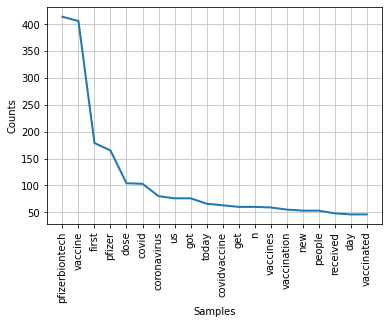

In [17]:
import matplotlib.pyplot as plt
fd.plot(20,cumulative = False)
plt.show()

In [18]:
x = df[['user_followers','user_friends','user_favourites','retweets']]

In [19]:
corr = x.corr()
corr

,user_followers,user_friends,user_favourites,retweets
user_followers,1.000000,-0.031534,-0.034246,0.059080
user_friends,-0.031534,1.000000,0.217072,0.032259
user_favourites,-0.034246,0.217072,1.000000,0.010738
retweets,0.059080,0.032259,0.010738,1.000000


In [20]:
rcParams['figure.figsize'] = (10, 6)
sb.set_style('whitegrid')

In [21]:
retweets = df['retweets']
user_followers = df['user_followers']

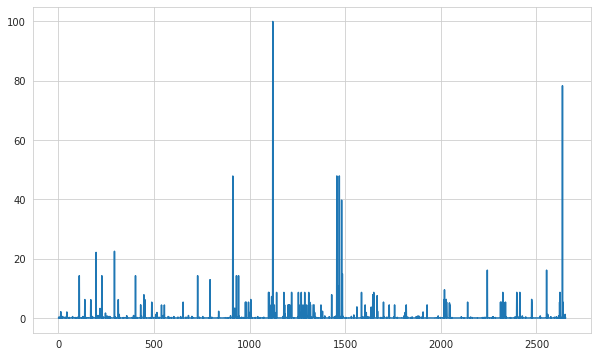

In [29]:
user_followers_matrix=user_followers.values.reshape(-1,1)
scaled = preprocessing.MinMaxScaler(feature_range=(0,100))
scaled_user_followers = scaled.fit_transform(user_followers_matrix)
plt.plot(scaled_user_followers)
plt.show()

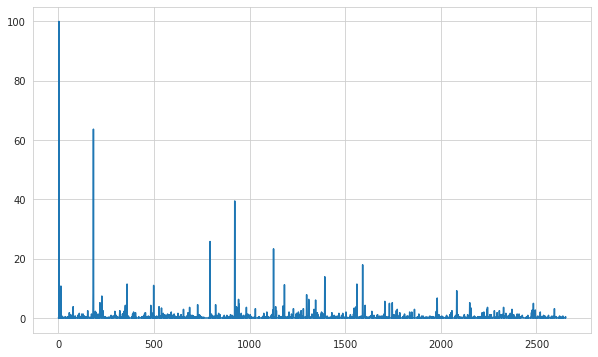

In [31]:
retweets_matrix = retweets.values.reshape(-1,1)
scaled = preprocessing.MinMaxScaler(feature_range=(0,100))
scaled_retweets = scaled.fit_transform(retweets_matrix)
plt.plot(scaled_retweets)
plt.show()

<AxesSubplot:xlabel='retweets', ylabel='user_followers'>

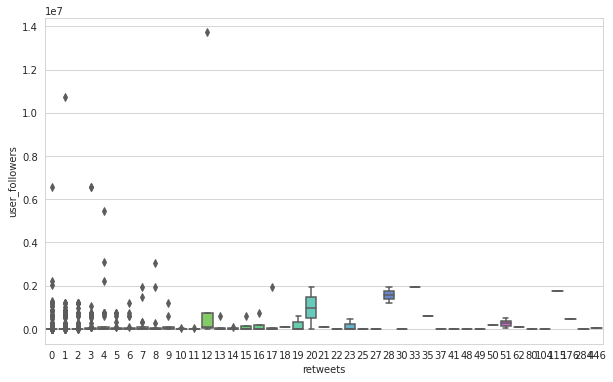

In [32]:
sb.boxplot(x = 'retweets' ,  y = 'user_followers' , data = df , palette = 'hls')
#df[(np.abs(stats.zscore(df['retweets'])) < 3)]

In [1]:
! pip3 install Plotly
! pip3 install cufflinks

In [2]:
! pip3 install chart_studio

In [3]:
import chart_studio.plotly as py
import cufflinks as cf
import plotly.tools as tls
import plotly.graph_objs as go
import chart_studio

In [7]:
chart_studio.tools.set_credentials_file(username='aciki', api_key='####')

In [12]:
from sklearn.preprocessing import StandardScaler
subset = df[['retweets','user_followers']]
df_data_std = StandardScaler().fit_transform(subset)
data_tweets = pd.DataFrame(df_data_std)
data_tweets.columns=['retweets','user_followers']

In [13]:
data_tweets.iplot(filename = 'data_retweets_uF')